In [1]:
from lexoid.api import parse_with_schema

e:\Lexoid\Lexoid\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Using Data Class

In [ ]:
from dataclasses import dataclass
from typing import List

@dataclass
class Accuracy:
    Percentage: int
    n: int

@dataclass
class TTC:
    time_taken: int
    n: int


@dataclass
class Results:
    accuracy: Accuracy
    time_to_complete: TTC

@dataclass
class DisabilityBallotData:
    """Dataclass for disability ballot completion data."""
    disability_category: str
    participants: int
    ballots_completed: int
    ballots_incomplete_terminated: int
    results: List[Results]

@dataclass
class DisabilityBallotDataList:
    Results: List[DisabilityBallotData]

# Usage with the updated parse_with_schema function:
pdf_path = "inputs/test_1.pdf"

# Now using the dataclass instead of the dictionary schema
parsed_result = parse_with_schema(
    path=pdf_path, 
    schema=DisabilityBallotDataList,  # Pass the dataclass type directly
    model="gemini-2.5-flash",
    api="gemini"
)


how schema looks like:
 {'type': 'object', 'properties': {'Percentage': {'type': 'integer'}, 'n': {'type': 'integer'}}, 'required': ['Percentage', 'n']}
how schema looks like:
 {'type': 'object', 'properties': {'time_taken': {'type': 'integer'}, 'n': {'type': 'integer'}}, 'required': ['time_taken', 'n']}
how schema looks like:
 {'type': 'object', 'properties': {'accuracy': {'type': 'object', 'properties': {'Percentage': {'type': 'integer'}, 'n': {'type': 'integer'}}, 'required': ['Percentage', 'n']}, 'time_to_complete': {'type': 'object', 'properties': {'time_taken': {'type': 'integer'}, 'n': {'type': 'integer'}}, 'required': ['time_taken', 'n']}}, 'required': ['accuracy', 'time_to_complete']}
how schema looks like:
 {'type': 'object', 'properties': {'disability_category': {'type': 'string'}, 'participants': {'type': 'integer'}, 'ballots_completed': {'type': 'integer'}, 'ballots_incomplete_terminated': {'type': 'integer'}, 'results': {'type': 'array', 'items': {'type': 'object', 'prope

2025-07-30 20:55:50.848 | DEBUG    | lexoid.api:parse_with_schema:413 - Processing page 1 with response: {
  "Results": [
    {
      "disability_category": "Blind",
      "participants": 5,
      "ballots_completed": 1,
      "ballots_incomplete_terminated": 4,
      "results": [
        {
          "accuracy": {
            "Percentage": 35,
            "n": 1
          },
          "time_to_complete": {
            "time_taken": 1199,
            "n": 1
          }
        }
      ]
    },
    {
      "disability_category": "Low Vision",
      "participants": 5,
      "ballots_completed": 2,
      "ballots_incomplete_terminated": 3,
      "results": [
        {
          "accuracy": {
            "Percentage": 98,
            "n": 2
          },
          "time_to_complete": {
            "time_taken": 1716,
            "n": 3
          }
        },
        {
          "accuracy": {
            "Percentage": 98,
            "n": 3
          },
          "time_to_complete": {
       

# Parse PDF to latex

In [1]:
from lexoid.api import parse_to_latex

# Usage with the updated parse_with_schema function:
pdf_path = "inputs/test_1.pdf"

# Now using the dataclass instead of the dictionary schema
parsed_result = parse_to_latex(
    path=pdf_path, 
    model="gemini-2.5-flash",
    api="gemini"
)

e:\Lexoid\Lexoid\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-08-14 21:00:07.848 | DEBUG    | lexoid.api:parse_to_latex:507 - Processing page 1 with response:
\documentclass{article}
\usepackage{amsmath, graphicx, geometry}
\usepackage{tabularx} % Required for tabularx environment
\usepackage{xcolor}   % Required for coloring table rows/cells
\usepackage{colortbl} % Required for coloring table rows/cells
\geometry{margin=1in}  % Ensure content stays within page bounds

% Define a light blue color for table headers
\definecolor{lightblue}{RGB}{204,229,255} 

\begin{document}

% Heading "Example table"
{\color{blue}\Huge\textbf{Example table}}

% Descriptive sentence
This is an example of a data table.

\vspace{1em} % Add some vertical space before the table

% Table
\begin{tabularx}{\textwidth}{| >{\r

### Output of the latex when seen via overleaf
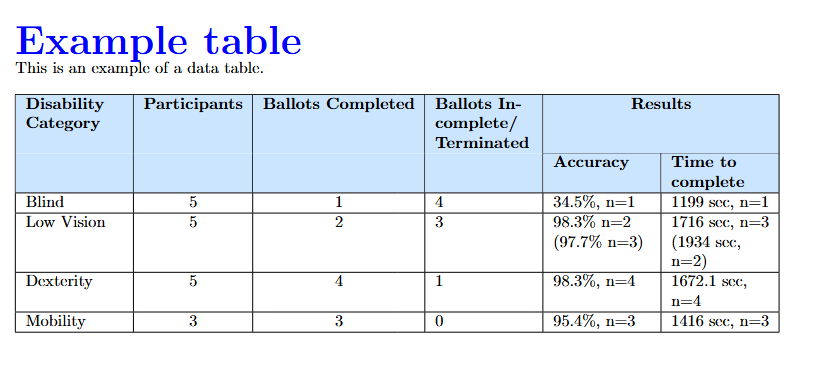

## Using Dic

In [3]:
sample_schema = [
    {
        "Disability Category": "string",
        "Participants": "int",
        "Ballots Completed": "int",
        "Ballots Incomplete/Terminated": "int",
        "Accuracy": ["string"],
        "Time to complete": ["string"]
    }
]

pdf_path = "inputs/test_1.pdf"

parsed_result = parse_with_schema(path=pdf_path, schema=sample_schema, model="gpt-4o") 

2025-06-28 19:16:55.213 | DEBUG    | lexoid.api:parse_with_schema:366 - Using API provider: openai
2025-06-28 19:17:06.102 | DEBUG    | lexoid.api:parse_with_schema:405 - Processing page 1 with response: [
  {
    "Disability Category": "Blind",
    "Participants": 5,
    "Ballots Completed": 1,
    "Ballots Incomplete/Terminated": 4,
    "Accuracy": [
      "34.5%, n=1"
    ],
    "Time to complete": [
      "1199 sec, n=1"
    ]
  },
  {
    "Disability Category": "Low Vision",
    "Participants": 5,
    "Ballots Completed": 2,
    "Ballots Incomplete/Terminated": 3,
    "Accuracy": [
      "98.3% n=2",
      "97.7%, n=3"
    ],
    "Time to complete": [
      "1716 sec, n=3",
      "1934 sec, n=2"
    ]
  },
  {
    "Disability Category": "Dexterity",
    "Participants": 5,
    "Ballots Completed": 4,
    "Ballots Incomplete/Terminated": 1,
    "Accuracy": [
      "98.3%, n=4"
    ],
    "Time to complete": [
      "1672.1 sec, n=4"
    ]
  },
  {
    "Disability Category": "Mobilit

In [2]:
sample_schema = {
    "provider_info": {
        "name": "string",
        "po_box": "string", 
        "city": "string",
        "state": "string",
        "zip_code": "string"
    },
    "statement_info": {
        "statement_date": "date",
        "pay_this_amount": "float",
        "account_number": "string",
        "show_amount_paid_here": "float|optional"
    },
    "patient_info": {
        "name": "string",
        "address_line_1": "string",
        "address_line_2": "string|optional",
        "city": "string", 
        "state": "string",
        "zip_code": "string"
    },
    "remit_to": {
        "name": "string",
        "po_box": "string",
        "city": "string",
        "state": "string", 
        "zip_code": "string"
    },
    "service_details": [
        {
            "date": "date",
            "patient": "string",
            "description": "string",
            "charge": "float",
            "insurance_receipts": "float|optional",
            "patient_receipts": "float|optional", 
            "adjustments": "float|optional",
            "insurance_pending": "float|optional",
            "patient_responsibility": "float"
        }
    ],
    "aging_summary": {
        "under_30": "float",
        "31_to_60": "float",
        "61_to_90": "float", 
        "91_to_120": "float",
        "121_to_150": "float",
        "over_151": "float",
        "total": "float"
    },
    "payment_info": {
        "amount_due": "float",
        "payment_method": "string|optional",
        "card_number": "string|optional",
        "expiration_date": "string|optional",
        "security_code": "string|optional", 
        "name_on_card": "string|optional",
        "signature": "string|optional"
    },
    "contact_info": {
        "billing_phone": "string|optional",
        "billing_hours": "string|optional"
    }
}

pdf_path = "inputs/medical_invoice_sample1.png"

parsed_result = parse_with_schema(path=pdf_path, schema=sample_schema, model="gemini-2.5-flash") 

2025-06-28 19:16:18.043 | DEBUG    | lexoid.api:parse_with_schema:366 - Using API provider: gemini
2025-06-28 19:16:27.490 | DEBUG    | lexoid.api:parse_with_schema:405 - Processing page 1 with response: {
  "provider_info": {
    "name": "Providence Anesthesiology Associates",
    "po_box": "PO Box 371863",
    "city": "Pittsburgh",
    "state": "PA",
    "zip_code": "15250-7863"
  },
  "statement_info": {
    "statement_date": "2020-08-21",
    "pay_this_amount": 463.30,
    "account_number": "PAA284850"
  },
  "patient_info": {
    "name": "JOHN SMITH",
    "address_line_1": "100 S TRYON ST",
    "address_line_2": "UNIT 001",
    "city": "CHARLOTTE",
    "state": "NC",
    "zip_code": "28202-3258"
  },
  "remit_to": {
    "name": "Providence Anesthesiology Associates",
    "po_box": "PO Box 371863",
    "city": "Pittsburgh",
    "state": "PA",
    "zip_code": "15250-7863"
  },
  "service_details": [
    {
      "date": "2020-03-09",
      "patient": "JOHN",
      "description": "Fac